In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Get the Data

In [31]:
r_cols = ['user_id', 'movie id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep = '\t', names = r_cols)
print(ratings.shape)
print(ratings.head())

(100000, 4)
   user_id  movie id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


In [32]:
i_cols = ['movie id', 'movie title','release date','video release date', 'IMDb URL', 'unknown',
          'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
          'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin-1')
print(items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
items = items[['movie id', 'movie title']]
items.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [34]:
ratings = pd.merge(ratings, items, on='movie id')
ratings.head()

,user_id,movie id,rating,unix_timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# EDA

In [35]:
ratings.groupby('movie title')['rating'].mean().sort_values(ascending = False).head(10)

movie title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [38]:
ratings.groupby('movie title')['rating'].count().sort_values(ascending = False).head(10)

movie title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

***creating a dataframe of average ratings and total number of ratings***

In [40]:
df = pd.DataFrame(ratings.groupby('movie title')['rating'].mean())
df.head()

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [41]:
df['Total Ratings'] = ratings.groupby('movie title')['rating'].count()
df.head()

,rating,Total Ratings
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


*Number of Ratings per movie*

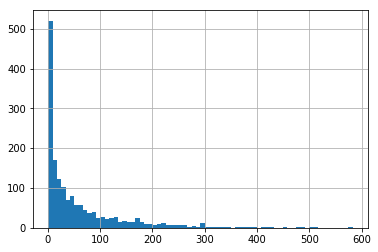

In [45]:
df['Total Ratings'].hist(bins = 70)

 *Average rating per movie*

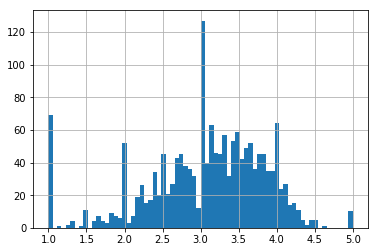

In [47]:
df['rating'].hist(bins = 70)

***Relationship between average rating and number of ratings***

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


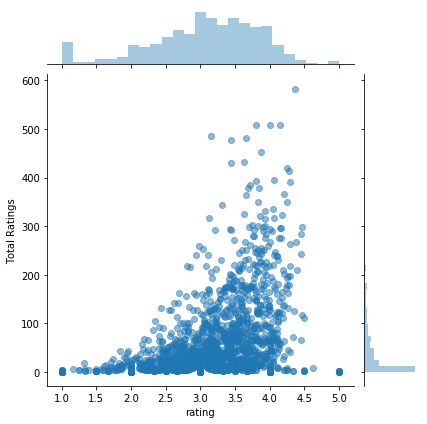

In [51]:
sns.jointplot(x = 'rating', y = 'Total Ratings', data = df, alpha = 0.5)

*More the number of ratings, more will be the average rating*

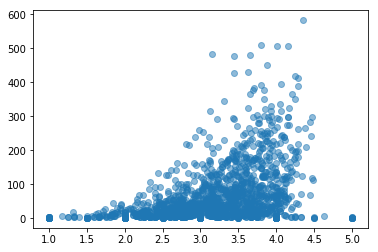

In [52]:
plt.scatter(df['rating'], df['Total Ratings'], alpha = 0.5)
plt.show()

# Recommending Similar Movie
We are going to make a movie matirx having all the users on one axis and all the movies on another axis. Each cell will then consist of the rating that user gave to the movie. NaN values are placed int the celle when user does not rate the movie.

In [54]:
moviemat = ratings.pivot_table(index = 'user_id', columns = 'movie title', values = 'rating')
moviemat.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


***Most Rated Movies***

In [56]:
df.sort_values('Total Ratings', ascending = False).head(10)

,rating,Total Ratings
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


**Let's choose two movies for our analysis, Star Wars, and Liar Liar.**

What are the user ratings for these movies.

In [66]:
star_war_users = moviemat['Star Wars (1977)']
liar_liar_users = moviemat['Liar Liar (1997)']

In [68]:
star_war_users.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

**As number of movies is greater than number of users so, we are using Item-Item based Collaborative Filtering.** 

*Correlation of every other movie with Star Wars.*

In [71]:
similar_to_star_wars = moviemat.corrwith(star_war_users)
similar_to_star_wars.sort_values(ascending = False).head()

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie title
Hollow Reed (1996)        1.0
Man of the Year (1995)    1.0
Star Wars (1977)          1.0
Stripes (1981)            1.0
Full Speed (1996)         1.0
dtype: float64

*Correlation of every other movie with Liar Liar.*

In [72]:
similar_to_liar_liar = moviemat.corrwith(liar_liar_users)
similar_to_liar_liar.sort_values(ascending = False).head()

c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\taruna garg\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie title
For Ever Mozart (1996)     1.0
Johnny 100 Pesos (1993)    1.0
Mina Tannenbaum (1994)     1.0
Liar Liar (1997)           1.0
Of Human Bondage (1934)    1.0
dtype: float64

***Removing NaN values and converting into DF from series***

In [75]:
corr_starwars = pd.DataFrame(similar_to_star_wars, columns = ['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

,Correlation
movie title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Perfectly correlated movies with StarWars?



In [77]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
movie title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


**Set a threshold for the number of ratings necessary and filter out the movies based on that**

In [79]:
corr_starwars = corr_starwars.join(df['Total Ratings'], how = 'left')
corr_starwars.head()

,Correlation,Total Ratings
movie title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


filter out the movies having less than 100 ratings (this is choosen based on the histogram)

In [82]:
corr_starwars[corr_starwars['Total Ratings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,Total Ratings
movie title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
